In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data load
df = pd.read_csv(r"C:\Users\Adhithya Raviprakash\OneDrive\Documents\GitHub\Auto-Pulse\data\processed\fd001_train_processed.csv")
df.shape
df.head()

,engine_id,cycle,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,...,htBleed_rolling_std_delta,phi_delta,phi_rolling_mean_delta,phi_rolling_std_delta,setting_1_delta,setting_1_rolling_mean_delta,setting_1_rolling_std_delta,setting_2_delta,setting_2_rolling_mean_delta,setting_2_rolling_std_delta
0,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,1.154701,0.14,0.150,-0.033931,-0.0062,-0.001633,0.001275,0.0006,0.000217,0.000308
1,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,-0.154701,0.44,0.185,0.091475,0.0050,0.000433,-0.000428,-0.0003,0.000033,-0.000062
2,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,0.095445,-0.67,-0.023,-0.063377,-0.0026,-0.000260,-0.000288,-0.0002,-0.000020,-0.000039
3,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,21.61,554.67,2388.02,...,0.044730,-0.51,0.004,-0.007156,-0.0024,-0.000720,0.000440,0.0001,0.000060,-0.000047
4,1,7,0.0010,0.0001,642.48,1592.32,1397.77,21.61,554.34,2388.02,...,0.000000,0.64,0.008,0.000235,0.0053,-0.000180,-0.000259,0.0002,0.000080,-0.000038


In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns[:10])
print("\nMissing Values:\n", df.isna().sum().sum())
print("\nBasic Stats:\n")
print(df.describe().T.head())

Shape: (20431, 105)

Columns:
 Index(['engine_id', 'cycle', 'setting_1', 'setting_2', 'T24', 'T30', 'T50',
       'P15', 'P30', 'Nf'],
      dtype='object')

Missing Values:
 0

Basic Stats:

             count        mean        std       min       25%     50%  \
engine_id  20431.0   51.516421  29.230979    1.0000   26.0000   52.00   
cycle      20431.0  109.858304  68.390102    3.0000   54.0000  105.00   
setting_1  20431.0   -0.000009   0.002188   -0.0087   -0.0015    0.00   
setting_2  20431.0    0.000002   0.000293   -0.0006   -0.0002    0.00   
T24        20431.0  642.683950   0.500360  641.2100  642.3300  642.65   

                75%       max  
engine_id   77.0000  100.0000  
cycle      157.0000  362.0000  
setting_1    0.0015    0.0087  
setting_2    0.0003    0.0006  
T24        643.0100  644.5300  


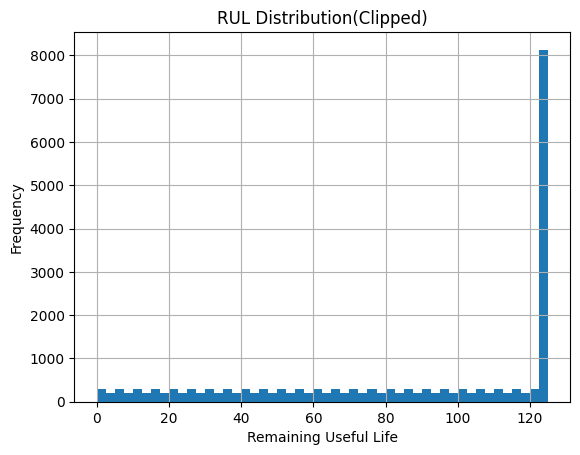

In [12]:
#Rul Distribution
plt.figure()
df["RUL"].hist(bins=50)
plt.title("RUL Distribution(Clipped)")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Frequency")
plt.show()

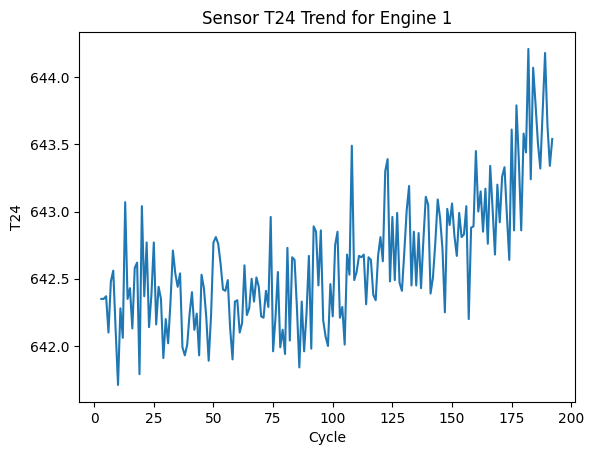

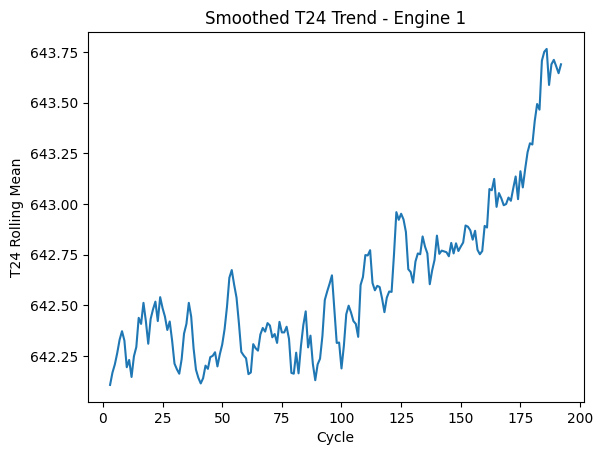

In [5]:
#Sensor Trend for One Engine (Critical for PM)
engine_sample = df[df["engine_id"] == 1].sort_values("cycle")

plt.figure()
plt.plot(engine_sample["cycle"], engine_sample["T24"])
plt.title("Sensor T24 Trend for Engine 1")
plt.xlabel("Cycle")
plt.ylabel("T24")
plt.show()

plt.figure()
plt.plot(engine_sample["cycle"], engine_sample["T24_rolling_mean"])
plt.title("Smoothed T24 Trend - Engine 1")
plt.xlabel("Cycle")
plt.ylabel("T24 Rolling Mean")
plt.show()

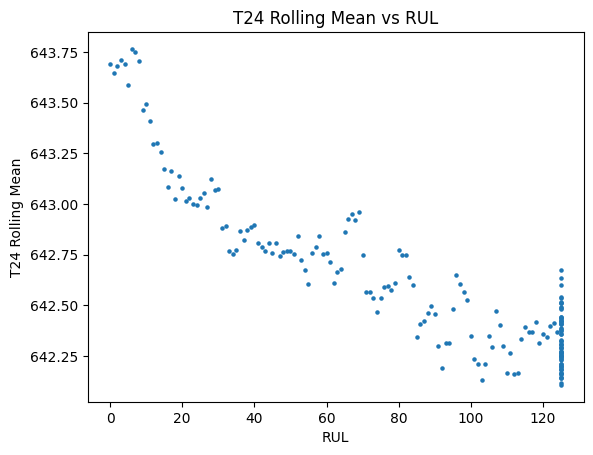

In [6]:
plt.figure()
plt.scatter(engine_sample["RUL"], engine_sample["T24_rolling_mean"], s=5)
plt.xlabel("RUL")
plt.ylabel("T24 Rolling Mean")
plt.title("T24 Rolling Mean vs RUL")
plt.show()

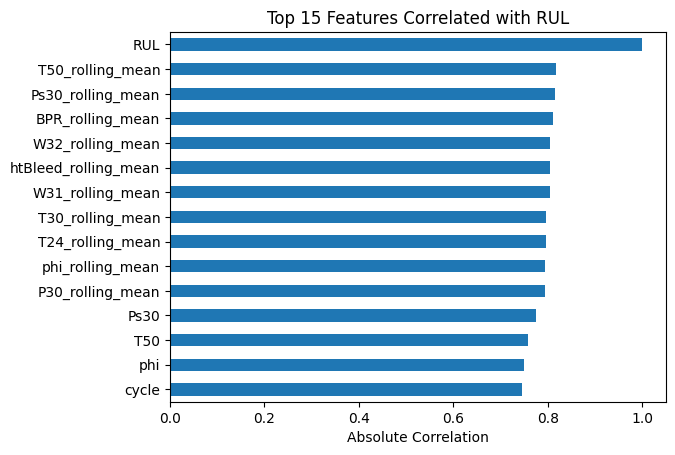

In [7]:
#Top 15 Features Correlated With RUL
numeric_df = df.select_dtypes(include=["float64", "int64"])

corr = numeric_df.corr()["RUL"].abs().sort_values(ascending=False)

top15 = corr.head(15)

plt.figure()
top15.sort_values().plot(kind="barh")
plt.title("Top 15 Features Correlated with RUL")
plt.xlabel("Absolute Correlation")
plt.show()

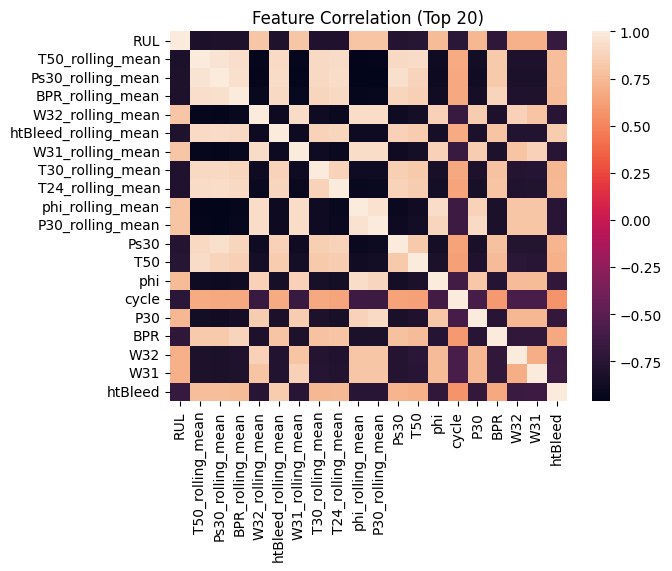

In [8]:
#Check Feature Redundancy

top20 = corr.index[:20]

plt.figure()
sns.heatmap(df[top20].corr(), annot=False)
plt.title("Feature Correlation (Top 20)")
plt.show()

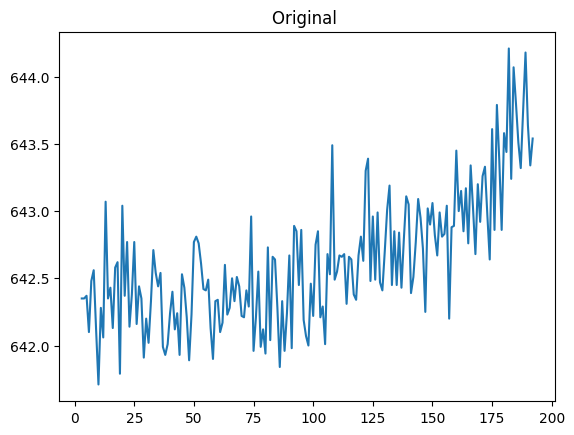

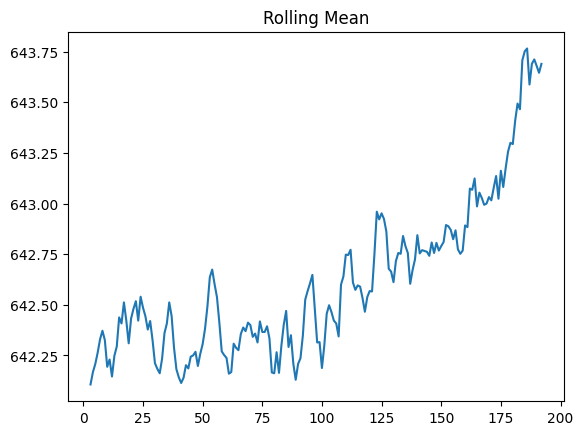

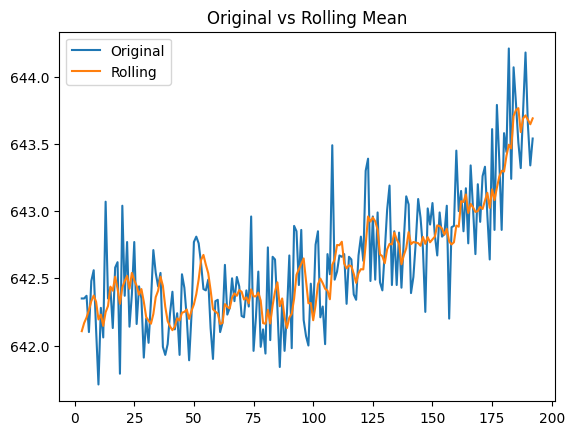

In [9]:
#Rolling Vs Original Features
plt.figure()
plt.plot(engine_sample["cycle"], engine_sample["T24"], label="Original")
plt.title("Original ")
plt.show()

plt.figure()
plt.plot(engine_sample["cycle"],engine_sample["T24_rolling_mean"], label="Rolling")
plt.title("Rolling Mean")
plt.show()

plt.figure()
plt.plot(engine_sample["cycle"], engine_sample["T24"], label="Original")
plt.plot(engine_sample["cycle"], engine_sample["T24_rolling_mean"], label="Rolling")
plt.legend()
plt.title("Original vs Rolling Mean")
plt.show()